# Multinomial Naive Bayes Classifier

## Example 1: Email Classifier (Spam or Non-Spam)

Classifying emails as spam or non-spam based on their content.

Load the training data into a Pandas DataFrame:

In [1]:
import os
import io
import numpy
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

def readFiles(path):
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root, filename)

            inBody = False
            lines = []
            f = io.open(path, 'r', encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            message = '\n'.join(lines)
            yield path, message

def dataFrameFromDirectory(path, classification):
    rows = []
    index = []
    for filename, message in readFiles(path):
        rows.append({'message': message, 'class': classification})
        index.append(filename)

    return DataFrame(rows, index=index)

data = DataFrame({'message': [], 'class': []})

data = data.append(dataFrameFromDirectory('Emails/Spam', 'spam'))
data = data.append(dataFrameFromDirectory('Emails/Non-Spam', 'non-spam'))

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


View the DataFrame:

In [2]:
data.head()

,class,message
Emails/Spam\Spam (1).00020fc9911604f6cae7ae0f598ad29d,spam,<html>\n\n\n\n\n\n\n\n<body>\n\n\n\n<div align...
Emails/Spam\Spam (1).0061e48e64f9ce93ffae69bba9151357,spam,Our delightful garden ornaments combine the fi...
Emails/Spam\Spam (1).0087354f4bb7c4e756124632a4a7e80a,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 3.2//E..."
Emails/Spam\Spam (1).00951a21b8464f4eb4e106d6b14c68b6,spam,This is a multi-part message in MIME format.\n...
Emails/Spam\Spam (1).00e388e3b23df6278a8845047ca25160,spam,------=_NextPart_000_00E8_85C13B1D.B7243B86\n\...


Use CountVectorizer to split up each message into list of words.

Call fit() to fit the Multinomial Naive Bayes classifier to our data.

In [3]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(data['message'].values) #features
targets = data['class'].values                            #labels
classifier = MultinomialNB()
classifier.fit(counts, targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Try it out:

In [4]:
examples = ["Free cash now!!!", "Hi Bob, how about a game of golf tomorrow?"]
example_counts = vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
predictions

array(['spam', 'non-spam'], dtype='<U8')

## Example 2: Predict Vehicle Speed Approaching a Bump

Classifying vehicle speed as slow or fast based on the size and distance to an upcoming bump in the road.

Fabricate the Dataset:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import make_blobs

n_samples = 10000

# Generate fabricated data set (create two blobs of randomly distributed data at two corners of the graph)
centers = [(0.9, 0.05), (0.05, 0.94)]
x, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=0.4,
                  centers=centers, shuffle=False, random_state=42)

# Filter out only the values that lie within [0,1]:
features = []
labels = []
for feature, label in zip(x, y):
    if (feature[0] >= 0 and feature[0] <= 1.0 and feature[1] >= 0 and feature[1] <= 1.0):
        features.append(feature)
        labels.append(label)

# Convert the results back into numpy arrays:
x = np.array(features)
y = np.array(labels)

Create a Multinomial Naive Bayes classifier model, fit it to our data, and visualize the results:

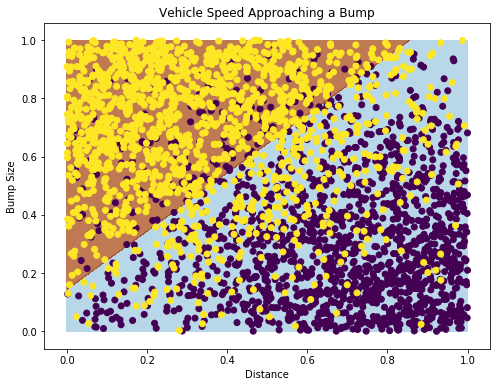

In [6]:
clf = MultinomialNB()
clf.fit(x, y)

def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0, 1.0, 0.001),
                     np.arange(0, 1.0, 0.001))
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 6))
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(x[:,0], x[:,1], c=y.astype(np.float))
    plt.xlabel('Distance')
    plt.ylabel('Bump Size')
    plt.title("Vehicle Speed Approaching a Bump")
    plt.show()
    
plotPredictions(clf)

Measure the Accuracy:

In [7]:
from sklearn.model_selection import cross_val_score

fold_scores = cross_val_score(clf, x, y, cv=5)
print (fold_scores)
print (np.mean(fold_scores))

[0.85245902 0.8295082  0.83251232 0.82758621 0.81773399]
0.831959945086005
